  accident_index  vehicle_reference  vehicle_type  towing_and_articulation  \
0  201506E098757                  2             9                        0   
1  201506E098766                  1             9                        0   
2  201506E098766                  2             9                        0   
3  201506E098777                  1            20                        0   
4  201506E098780                  1             9                        0   

   vehicle_manoeuvre  vehicle_location-restricted_lane  junction_location  \
0                 18                                 0                  8   
1                  9                                 0                  8   
2                 18                                 0                  8   
3                  4                                 0                  0   
4                 15                                 0                  1   

   skidding_and_overturning  hit_object_in_carriageway  \
0         

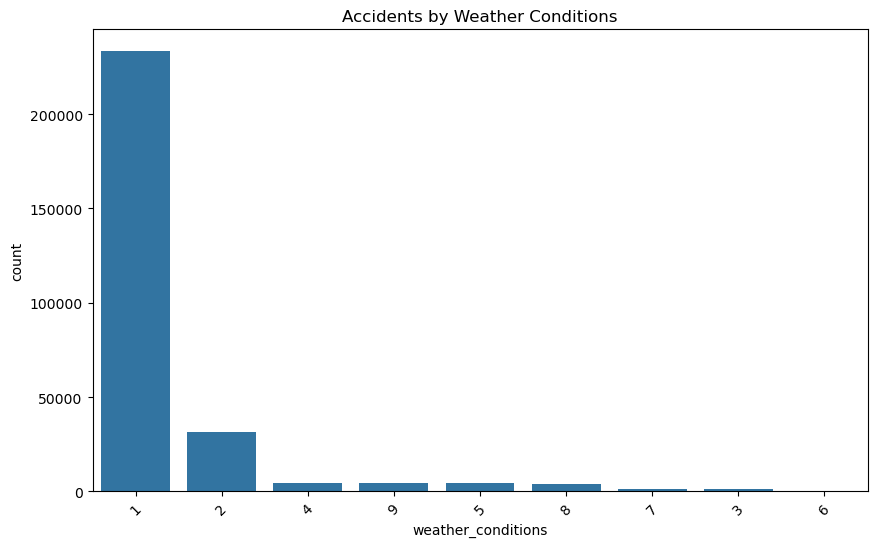

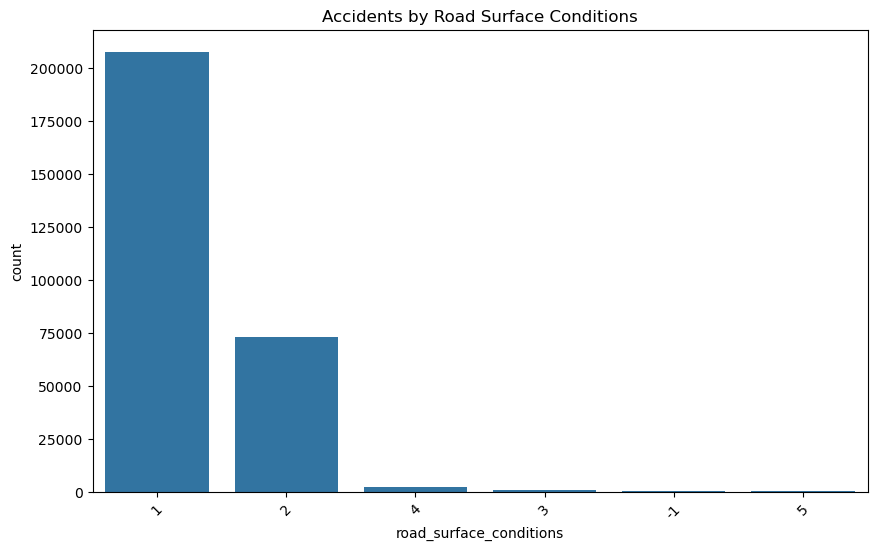

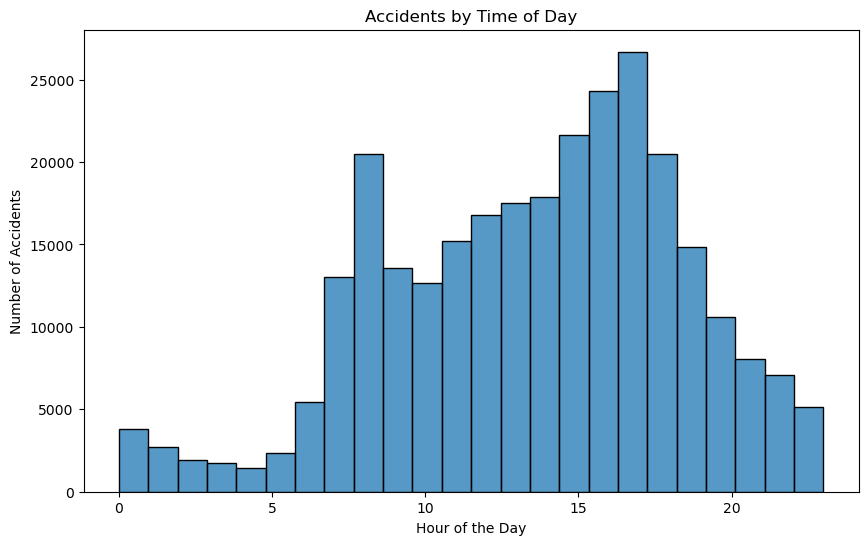

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import folium
file_path = "task4.csv"  # Replace with your dataset path
data = pd.read_csv(file_path, low_memory=False)
print(data.head())
print(data.info())
missing_values = data.isnull().sum()
print("\nMissing values:\n", missing_values[missing_values > 0])

# Visualization: Accidents by Weather Conditions
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='weather_conditions', order=data['weather_conditions'].value_counts().index)
plt.title('Accidents by Weather Conditions')
plt.xticks(rotation=45)
plt.show()

# Visualization: Accidents by Road Surface Conditions
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='road_surface_conditions', order=data['road_surface_conditions'].value_counts().index)
plt.title('Accidents by Road Surface Conditions')
plt.xticks(rotation=45)
plt.show()

# Visualization: Accidents by Time of Day
plt.figure(figsize=(10, 6))
data['hour'] = pd.to_datetime(data['time'], errors='coerce').dt.hour
sns.histplot(data=data, x='hour', bins=24, kde=False)
plt.title('Accidents by Time of Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Accidents')
plt.show()

# Drop rows with missing longitude or latitude values
cleaned_data = data.dropna(subset=['longitude', 'latitude'])

# Create a GeoDataFrame
gdf = gpd.GeoDataFrame(
    cleaned_data,
    geometry=gpd.points_from_xy(cleaned_data['longitude'], cleaned_data['latitude']),
    crs="EPSG:4326"
)

# Create a folium map centered on the mean latitude and longitude
m = folium.Map(
    location=[cleaned_data['latitude'].mean(), cleaned_data['longitude'].mean()],
    zoom_start=10
)

# Add points to the map
for _, row in gdf.iterrows():
    folium.Marker([row.geometry.y, row.geometry.x]).add_to(m)

# Display the map (if running in Jupyter)
m


# Add accident locations to the map
for _, row in gdf.iterrows():
    folium.CircleMarker(
        location=[row.geometry.y, row.geometry.x],
        radius=3,
        color='red',
        fill=True,
        fill_opacity=0.5
    ).add_to(m)

# Save and display map
m.save("accident_hotspots_map.html")
print("Map saved as 'accident_hotspots_map.html'. Open it in a browser to view.")

# Conclusion
print("\nAnalysis complete. Visualizations displayed and map saved.")
